In [15]:
import importlib
import numpy as np
import hopfieldNetwork as hn
import matplotlib.pyplot as plt

In [16]:
N2 = 1024
log2N2 = int(np.log2(N2))
pictures_patterns = np.loadtxt('pict.dat', delimiter=',')
pictures_patterns = pictures_patterns.reshape((11, 1024))
pictures_patterns.shape

(11, 1024)

In [17]:
importlib.reload(hn)
hop_net2 = hn.HopfieldNetwork(pictures_patterns[:3,:])
for i, s in enumerate(hop_net2.states):
    print(i, hop_net2.energy(s))

0 -1439.390625
1 -1365.640625
2 -1462.25


In [18]:
hop_net2.energy(pictures_patterns[9])

-415.98046875

In [19]:
hop_net2.energy(pictures_patterns[10])

-173.5

In [23]:
inter, spurios_patt, _ = hop_net2.update_rule(pictures_patterns[10], log2N2)
hop_net2.energy(spurios_patt)

Fixed Point found after 10 iterations!
This pattern is an attractor!
[1. 1. 1. ... 1. 1. 1.] 



-1596.01171875

Fixed Point found after 9000 iterations!
Convergence towards stored pattern nb 0!
[-1. -1. -1. ... -1. -1. -1.] 



Text(0, 0.5, 'energy')

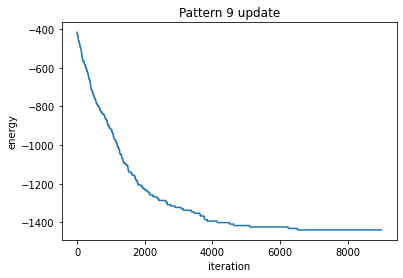

In [20]:
_, _, energy = hop_net2.update_rule(pictures_patterns[9], 9000, sync=False)
plt.plot(range(len(energy)), energy)
plt.title('Pattern 9 update')
plt.xlabel('iteration')
plt.ylabel('energy')

Fixed Point found after 9000 iterations!
Convergence towards stored pattern nb 2!
[1. 1. 1. ... 1. 1. 1.] 



Text(0, 0.5, 'energy')

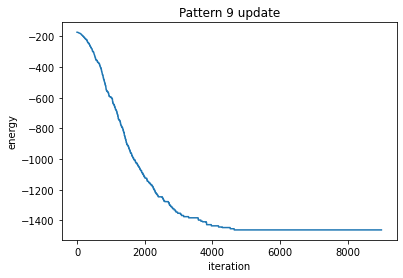

In [22]:
_, _, energy = hop_net2.update_rule(pictures_patterns[10], 9000, sync=False)
plt.plot(range(len(energy)), energy)
plt.title('Pattern 9 update')
plt.xlabel('iteration')
plt.ylabel('energy')

### Random weight matrix

In [24]:
hop_net2.W = np.random.normal(0, 1, size=hop_net2.W.shape)

Fixed Point found after 9000 iterations!
This pattern is an attractor!
[-1.  1.  1. ... -1.  1.  1.] 



Text(0, 0.5, 'energy')

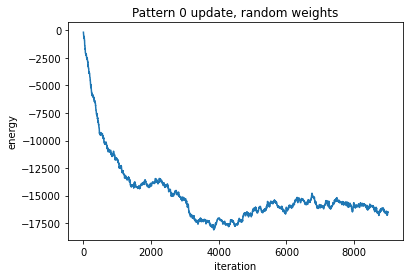

In [26]:
_, _, energy = hop_net2.update_rule(pictures_patterns[0], 9000, sync=False)
plt.plot(range(len(energy)), energy)
plt.title('Pattern 0 update, random weights')
plt.xlabel('iteration')
plt.ylabel('energy')

### Symmetric weight matrix

In [27]:
W = hop_net2.W.copy()
hop_net2.W = 0.5*(W + W.T) 

Fixed Point found after 9000 iterations!
This pattern is an attractor!
[ 1. -1. -1. ...  1. -1. -1.] 



Text(0, 0.5, 'energy')

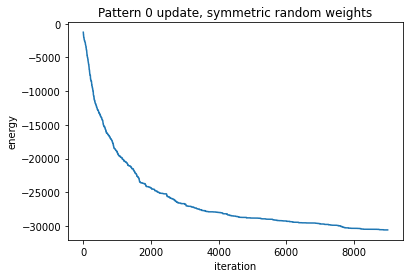

In [28]:
_, _, energy = hop_net2.update_rule(pictures_patterns[9], 9000, sync=False)
plt.plot(range(len(energy)), energy)
plt.title('Pattern 0 update, symmetric random weights')
plt.xlabel('iteration')
plt.ylabel('energy')